In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [2]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [3]:
file_name

'D:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/CATASTRO/CATASTRO_2023-04-06.shp'

In [4]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

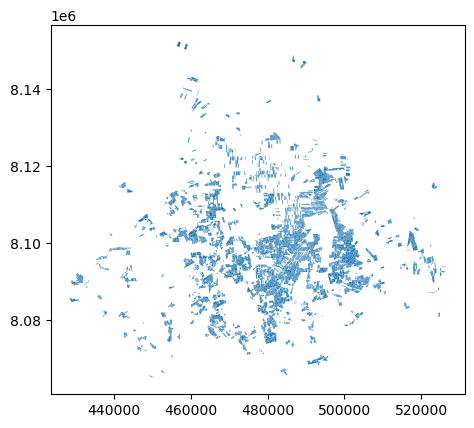

In [5]:
data.plot()
plt.show()

In [6]:
data.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
0,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,2018-05-30,FA,IAG,4,canha,79,0.77,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,2011-05-20,FY,None,11,canha,79,3.84,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,2018-05-20,FY,IAG,4,canha,79,2.25,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."


In [7]:
data.crs.name

'WGS 84 / UTM zone 20S'

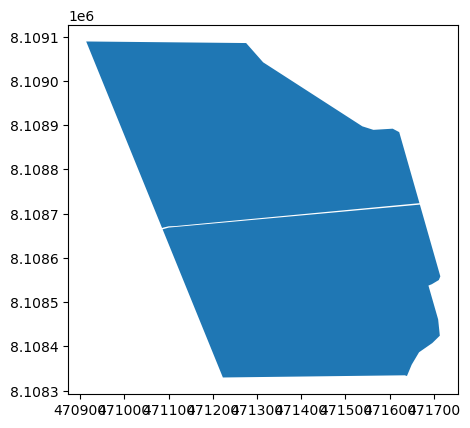

In [52]:
propiedad = data[data['unidad_01']==1922]
propiedad.plot()
plt.show()

In [53]:
def quitar_caracteres(text):
    text = text.replace('_', ' ')
    text = text.replace('"', '')
    text = text.replace('.', '')
    return text

In [54]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'unidad_01':'int',
    'unidad_03':'int'
})

In [55]:
propiedad.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
12896,000019220000L1,1922,SANTA_MARIA_II-SGARABOTTO,13203,SGARABOTTO_MENDEZ_MARCOS_EDUARDO,L1,UCG_90-20,2018-06-08,FY,None,4,canha,69,19.63,"POLYGON Z ((471638.909 8108333.115 0.000, 4716..."
12897,000019220000L2,1922,SANTA_MARIA_II-SGARABOTTO,13203,SGARABOTTO_MENDEZ_MARCOS_EDUARDO,L2,UCG_90-20,2018-06-08,FY,None,4,canha,69,20.69,"POLYGON Z ((471275.395 8109085.726 0.000, 4713..."


In [56]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']
file_name

'1922_SANTA_MARIA_II-SGARABOTTO'

In [57]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financia,soca,cultivo,zona,area,geometry
12896,000019220000L1,1922,SANTA_MARIA_II-SGARABOTTO,13203,SGARABOTTO_MENDEZ_MARCOS_EDUARDO,L1,UCG_90-20,2018-06-08,FY,None,4,canha,69,19.63,"POLYGON Z ((471638.909 8108333.115 0.000, 4716..."
12897,000019220000L2,1922,SANTA_MARIA_II-SGARABOTTO,13203,SGARABOTTO_MENDEZ_MARCOS_EDUARDO,L2,UCG_90-20,2018-06-08,FY,None,4,canha,69,20.69,"POLYGON Z ((471275.395 8109085.726 0.000, 4713..."


In [58]:
num_columnas = len(propiedad.columns)
num_columnas

15

In [59]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [60]:
propiedad.head(3)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financia,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
12896,000019220000L1,1922,SANTA_MARIA_II-SGARABOTTO,13203,SGARABOTTO_MENDEZ_MARCOS_EDUARDO,L1,UCG_90-20,2018-06-08,FY,None,...,19.63,UCG_90-20,2018-06-08,4,,0,13203,1922,000019220000L1,0
12897,000019220000L2,1922,SANTA_MARIA_II-SGARABOTTO,13203,SGARABOTTO_MENDEZ_MARCOS_EDUARDO,L2,UCG_90-20,2018-06-08,FY,None,...,20.69,UCG_90-20,2018-06-08,4,,0,13203,1922,000019220000L2,0


In [61]:
propiedad.columns

Index(['cod', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05',
       'var', 'fs', 'tex', 'financia', 'soca', 'cultivo', 'zona', 'area',
       'geometry', 'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD',
       'FECHA_SIEM', 'CORTE', 'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP',
       'ID', 'CUADRANTE'],
      dtype='object')

In [62]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [63]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
12896,"POLYGON Z ((471638.909 8108333.115 0.000, 4716...",L1,FY,19.63,UCG_90-20,2018-06-08,4,,0,13203,1922,000019220000L1,0
12897,"POLYGON Z ((471275.395 8109085.726 0.000, 4713...",L2,FY,20.69,UCG_90-20,2018-06-08,4,,0,13203,1922,000019220000L2,0


In [64]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        elif year > 2000:
            return 'SOCA'
        else:
            return 'RENOVACION'
    except Exception as ex:
        return 'RENOVACION'

In [65]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [66]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [67]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
12896,"POLYGON Z ((471638.909 8108333.115 0.000, 4716...",L1,FY,19.63,UCG_90-20,20180608,4,SOCA,0,13203,1922,000019220000L1,0
12897,"POLYGON Z ((471275.395 8109085.726 0.000, 4713...",L2,FY,20.69,UCG_90-20,20180608,4,SOCA,0,13203,1922,000019220000L2,0


In [68]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [69]:
tchs = pd.read_excel(fp_tch)

In [70]:
tchs.head(3)

,COD_AVANCE,CODIGO CAÑERO,INS,NOMBRE CAÑERO,DESSIG,CREA,COMPROMISO GRUPAL,COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,TN ENTREGA GRUPAL,TN ENTREGADAS INDIVIDUAL,% ENTREGA GRUPAL,HA COSECHA GRUPAL,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2022,RENDIMIENTO 2021,ESTIMATIVA RENDIMIENTO 2022,OBSERVACIONES
0,131_1,2224,NaN,CRUZ VARGAS WILLY WALDO,NaN,NaN,7067.07,0.00,NaN,NaN,0.00,42.86,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,81_36,41555,81.0,FRANCO GUZMAN CARLA DANIELA,NaN,NaN,7053.98,7053.98,0.0,0.0,7138.06,7138.06,1.011920,0.0,0.0,NaN,NaN,0.000000,59.896088,SIN CATASTRO
2,50_29,15501,50.0,WENDE RIOJA MAURICIO,NaN,NaN,4525.38,4525.38,0.0,0.0,3537.96,3537.96,0.781804,0.0,0.0,NaN,NaN,39.153575,0.000000,SIN CATASTRO


In [71]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO'] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [72]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'RENDIMIENT':'float',
    'COD_CA':'int',
    'COD_PROP':'int'
})

In [73]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
12896,"POLYGON Z ((471638.909 8108333.115 0.000, 4716...",L1,FY,19.63,UCG_90-20,20180608,4,SOCA,97.315703,13203,1922,000019220000L1,0
12897,"POLYGON Z ((471275.395 8109085.726 0.000, 4713...",L2,FY,20.69,UCG_90-20,20180608,4,SOCA,97.315703,13203,1922,000019220000L2,0


In [84]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [85]:
bloques = pd.read_excel(fp_bloques)

In [86]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,riegos_pos,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG9020,44743,44743.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG9020,44768,44768.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA8522,44783,44783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN


In [87]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [88]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
12896,"POLYGON Z ((471638.909 8108333.115 0.000, 4716...",L1,FY,19.63,UCG 90-20,20180608,4,SOCA,97.315703,13203,1922,000019220000L1,359
12897,"POLYGON Z ((471275.395 8109085.726 0.000, 4713...",L2,FY,20.69,UCG 90-20,20180608,4,SOCA,97.315703,13203,1922,000019220000L2,359


In [89]:
propiedad['ID'] = propiedad.apply(lambda x : '0000' + str(x['COD_PROP']) + '0000' + x['NOM_LOTE'], axis=1)

In [90]:
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
12896,"POLYGON Z ((471638.909 8108333.115 0.000, 4716...",L1,FY,19.63,UCG 90-20,20180608,4,SOCA,97.315703,13203,1922,000019220000L1,359
12897,"POLYGON Z ((471275.395 8109085.726 0.000, 4713...",L2,FY,20.69,UCG 90-20,20180608,4,SOCA,97.315703,13203,1922,000019220000L2,359


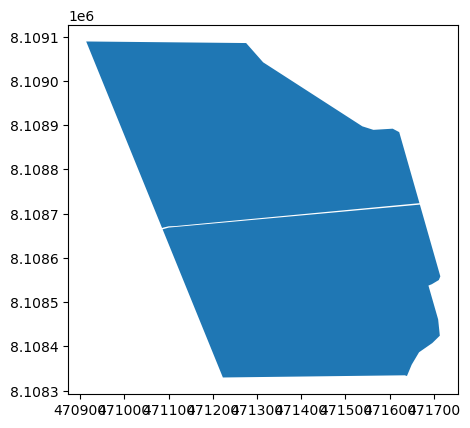

In [91]:
propiedad.plot()
plt.show()

In [92]:
#quitar_caracteres
propiedad['VARIEDAD'] = propiedad['VARIEDAD'].apply(quitar_caracteres)

In [93]:
propiedad

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
12896,"POLYGON Z ((471638.909 8108333.115 0.000, 4716...",L1,FY,19.63,UCG 90-20,20180608,4,SOCA,97.315703,13203,1922,000019220000L1,359
12897,"POLYGON Z ((471275.395 8109085.726 0.000, 4713...",L2,FY,20.69,UCG 90-20,20180608,4,SOCA,97.315703,13203,1922,000019220000L2,359


In [94]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
12896,"POLYGON Z ((471638.909 8108333.115 0.000, 4716...",L1,FY,19.63,UCG 90-20,20180608,4,SOCA,97.315703,13203,1922,000019220000L1,359
12897,"POLYGON Z ((471275.395 8109085.726 0.000, 4713...",L2,FY,20.69,UCG 90-20,20180608,4,SOCA,97.315703,13203,1922,000019220000L2,359


In [95]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 66°W to 60°W - by country
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [96]:
propiedad = propiedad.to_crs(epsg=4326)

In [44]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [97]:
propiedad['SUPERFICIE'].sum()

40.32

In [98]:
file_name + '.geojson'

'1922_SANTA_MARIA_II-SGARABOTTO.geojson'

In [99]:
#file_name='d'

In [100]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\PROPIEDADES_OFFICIALES")

In [101]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [102]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\PROPIEDADES_OFFICIALES\\1922_SANTA_MARIA_II-SGARABOTTO.geojson'

In [103]:
propiedad.to_file(out_dir, driver='GeoJSON')